In [49]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn import cross_validation


# Load in the dataset
df = pd.read_csv("https://s3.amazonaws.com/demo-datasets/wine.csv")
df.head()

/Users/mwitebsky/anaconda2/envs/lesson01/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color,is_red,high_quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,1.0,0.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,1.0,0.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,1.0,0.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,1.0,0.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,1.0,0.0


In [2]:
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,is_red,high_quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.246114,0.196552
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779,0.397421
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,0.000000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,0.000000,0.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,0.000000,0.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000,1.000000


## Goal 
Beat 50% accuracy -- better than random

## Deciding on x Variables

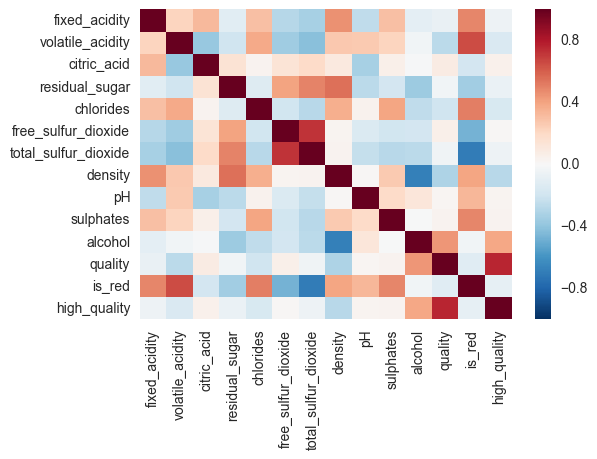

In [41]:
sns.heatmap(df.corr())

In [38]:
df.corr()['high_quality']

fixed_acidity          -0.049447
volatile_acidity       -0.151714
citric_acid             0.054444
residual_sugar         -0.063992
chlorides              -0.161781
free_sulfur_dioxide     0.014767
total_sulfur_dioxide   -0.051226
density                -0.275441
pH                      0.028149
sulphates               0.033971
alcohol                 0.390486
quality                 0.759360
is_red                 -0.087479
high_quality            1.000000
Name: high_quality, dtype: float64

In [9]:
df[df['high_quality'] == 1]['quality'].value_counts()

7    1079
8     193
9       5
Name: quality, dtype: int64

In [10]:
df.corr()['quality']

fixed_acidity          -0.076743
volatile_acidity       -0.265699
citric_acid             0.085532
residual_sugar         -0.036980
chlorides              -0.200666
free_sulfur_dioxide     0.055463
total_sulfur_dioxide   -0.041385
density                -0.305858
pH                      0.019506
sulphates               0.038485
alcohol                 0.444319
quality                 1.000000
is_red                 -0.119323
high_quality            0.759360
Name: quality, dtype: float64

In [14]:
x = df['quality'].reshape(-1,1)
y = df['high_quality']

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(x, y)

knn.score(x, y)

1.0

## Unscaled

In [46]:
x = df[['volatile_acidity', 'chlorides', 'density', 'alcohol']]
x_scaled = preprocessing.scale(x)
x_scaled2 = preprocessing.StandardScaler()
x_scaled2 = x_scaled2.fit_transform(x)
y = df['high_quality']

knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(x, y)
knn.score(x, y)

0.85793443127597357

## Scaled - Scale

In [47]:
knn.fit(x_scaled, y)
knn.score(x_scaled, y)

0.85978143758657843

## Scaled - Standard Scaler

In [48]:
knn.fit(x_scaled2, y)
knn.score(x_scaled2, y)

0.85978143758657843

## Cross Validation

In [51]:
# subset = df.sample(frac= .2)
# x = subset[['volatile_acidity', 'chlorides', 'density', 'alcohol']]
# x_scaled = preprocessing.scale(x)
# y = subset['high_quality']

# knn.fit(x, y)
# knn.score(x, y)

scores = cross_validation.cross_val_score(knn, x, y, cv=7)
scores

array([ 0.81700753,  0.73950484,  0.79978471,  0.78771552,  0.80818966,
        0.73139159,  0.74325782])

In [36]:
knn.fit(x_scaled, y)
knn.score(x_scaled, y)

0.87451886066204776

In [58]:
my_scores = {}
for n in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=n)
    scores = cross_validation.cross_val_score(knn, x_scaled, y, cv=7)
    my_scores[n] = scores.mean()
my_scores

{1: 0.74509673242098651,
 2: 0.77635388959798901,
 3: 0.75403244064847463,
 4: 0.78266845795618223,
 5: 0.7697377455901836,
 6: 0.78112888338317354,
 7: 0.77573895744134158,
 8: 0.79298416479298395,
 9: 0.7863673551010415,
 10: 0.79560481326440236}